# OpenCV - Image Processing

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Version

In [2]:
print(cv2.__version__)

3.4.2


## Images

(400, 248, 3)


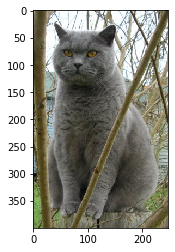

In [3]:
image = cv2.imread('../images/cat.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
print(image.shape)

(400, 248)


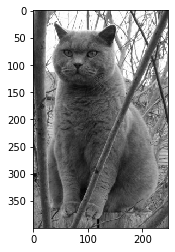

In [4]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
print(gray_image.shape)

## Resizing

(50, 30, 3)


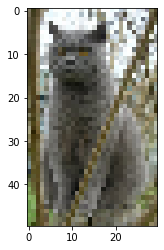

In [5]:
smaller_image = cv2.resize(image, (30, 50), interpolation=cv2.INTER_LINEAR) 
plt.imshow(smaller_image)
print(smaller_image.shape)

## Translation

$$
\begin{pmatrix} x_{new} \\ y_{new} \end{pmatrix}
=
\begin{pmatrix} 1 & 0 & x_t \\ 0 & 1 & y_t \end{pmatrix}
\begin{pmatrix}
{ x_{old} \\ y_{old} \\ 1 }
\end{pmatrix}
$$

[[  1.   0.  50.]
 [  0.   1. -80.]]


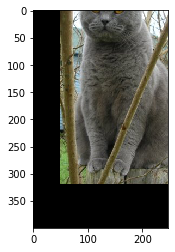

In [6]:
rows, cols, channel = image.shape
translation_matrix = np.float32([[1,0,50], [0,1,-80]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
plt.imshow(translated_image)
print(translation_matrix)

## Rotation

$$
\begin{pmatrix} x_{new} \\ y_{new} \end{pmatrix}
=
\begin{pmatrix}
\alpha & \beta & (1-\alpha) \cdot c_x - \beta \cdot c_y \\
-\beta & \alpha & \beta \cdot c_x + (1-\alpha) \cdot c_y 
\end{pmatrix}
\begin{pmatrix}
{ x_{old} \\ y_{old} \\ 1 }
\end{pmatrix} \\
\alpha = scale \times \cos \theta \\
\beta = scale \times \sin \theta
$$
- See https://cristianpb.github.io/blog/image-rotation-opencv for more information.

[[   0.70710678    0.70710678 -105.1025971 ]
 [  -0.70710678    0.70710678  146.25988463]]


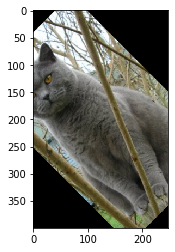

In [7]:
rows, cols, channel = image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
plt.imshow(rotated_image)
print(rotation_matrix)

### Calculation of rotation matrix 

In [8]:
import math

scale = 1.0
theta = 45 / 180 * math.pi
alpha = scale * math.cos(theta)
beta = scale * math.sin(theta)

In [9]:
print(np.array([[alpha, beta, (1 - alpha) * cols / 2 - beta * rows / 2],
                [-beta, alpha, beta * cols / 2 + (1 - alpha) * rows / 2]]))

[[   0.70710678    0.70710678 -105.1025971 ]
 [  -0.70710678    0.70710678  146.25988463]]


## Affine Transformation

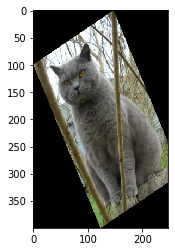

In [10]:
pts1 = np.float32([[0, 0], [cols, 0], [0, rows]])
pts2 = np.float32([[0, 100], [cols-100, 0], [cols/2, rows]])
affine_matrix = cv2.getAffineTransform(pts1,pts2)
affined_image = cv2.warpAffine(image, affine_matrix, (cols, rows))
_ = plt.imshow(affined_image)

## Perspective Transformation

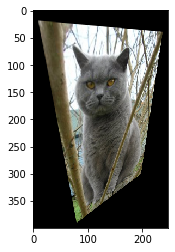

In [11]:
pts1 = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
pts2 = np.float32([[10, 20], [cols-10, 40], [80, rows-10], [cols-50, rows-100]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_image = cv2.warpPerspective(image, perspective_matrix, (cols, rows))
_ = plt.imshow(perspective_image)

## Image Thresholding

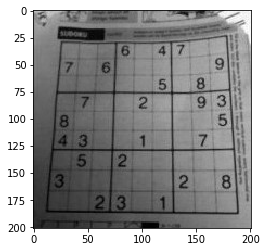

In [12]:
image = cv2.imread('../images/sudoku.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_ = plt.imshow(image, cmap='gray')

### Simple Thresholding

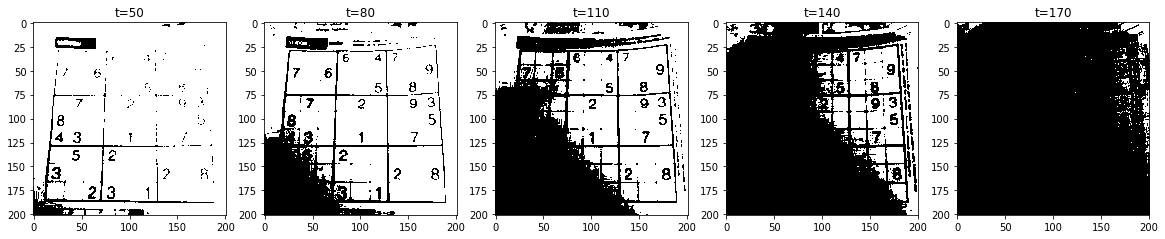

In [13]:
plt.figure(figsize=(20, 5))
for i, threshold in enumerate(range(50, 200, 30)):
    threshold_value, binarized_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    plt.subplot(1, 5, i + 1)
    plt.title('t=' + str(threshold))
    plt.imshow(binarized_image, cmap='gray')

### Otsu’s Binarization

t = 106.0


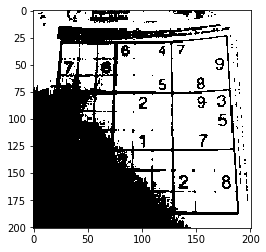

In [14]:
threshold_value, adaptive_3 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(adaptive_3, cmap='gray')
print('t =', threshold_value)

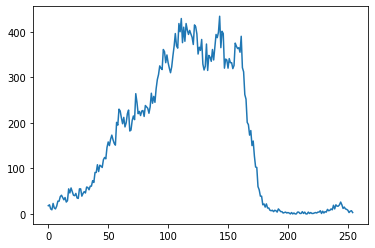

In [15]:
histogram = np.zeros(shape=(255,), dtype=np.int32)

for i in range(255):
    # Get the number of pixels that pixel value is i.
    histogram[i] = len(gray_image[gray_image == i])

plt.plot(list(range(255)), histogram)
plt.show()

### Adaptive Thresholding

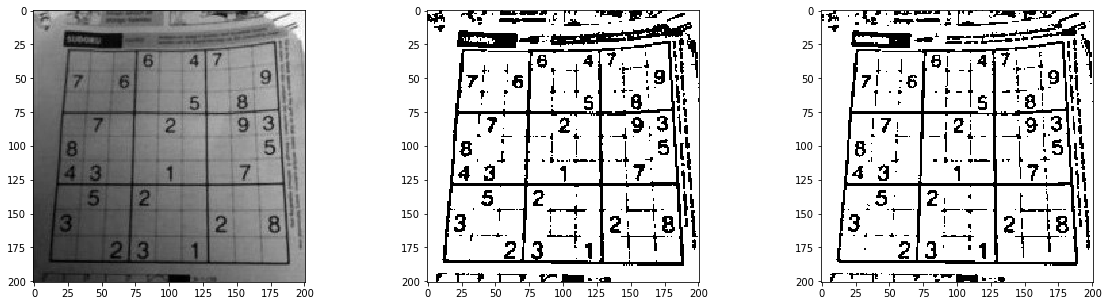

In [16]:
block_size = 21
offset = 10
adaptive_1 = cv2.adaptiveThreshold(gray_image, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,
                                   block_size, offset)
adaptive_2 = cv2.adaptiveThreshold(gray_image, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                   block_size, offset)
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(adaptive_1, cmap='gray')
plt.subplot(1, 3, 3)
_ = plt.imshow(adaptive_2, cmap='gray')

## Image Blurring

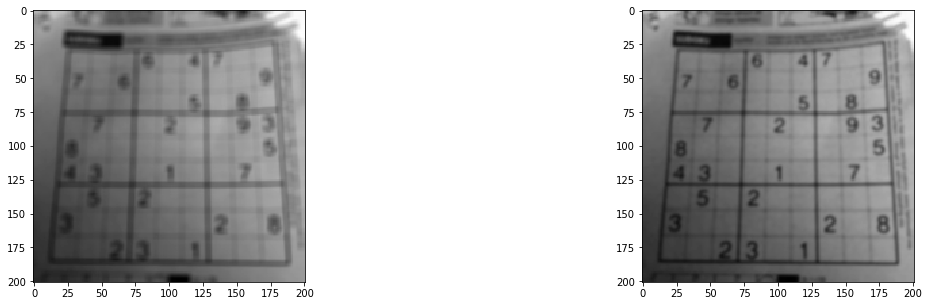

In [17]:
blurred_image_1 = cv2.blur(gray_image, (5, 5))
blurred_image_2 = cv2.GaussianBlur(gray_image, (5, 5), 0)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_image_1, cmap='gray')
plt.subplot(1, 2, 2)
_ = plt.imshow(blurred_image_2, cmap='gray')

## Morphological Transformations
- See https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#morphological-ops for more information.

## Image Gradients

$$
kernel_{laplacian} = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix},\quad
kernel^x_{sobel} = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix},\quad
kernel^y_{sobel} = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}.
$$

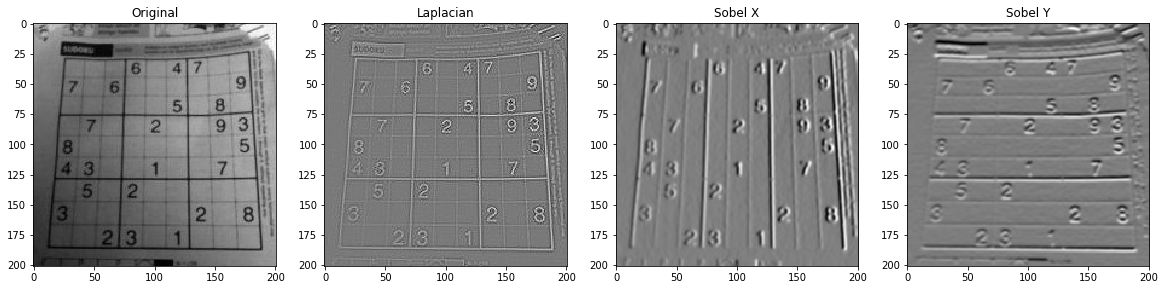

In [18]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_32F)
sobel_x = cv2.Sobel(gray_image, cv2.CV_32F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_32F, 0, 1, ksize=5)

images = [gray_image, laplacian, sobel_x, sobel_y]
titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']
plt.figure(figsize=(20, 5))

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

plt.show()

## Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
- https://github.com/todddangerfarr/intro-to-computer-vision-with-python-opencv/tree/master/02%20Lecture%20Slides